# Prediction of heart strokes using a Machine learning model (KNN) 

###  Pendyala, Sai Charan Suresh (PeoplesoftId: 2093975)


### Abstract:
#### One of the major reason noticed in patient deaths in recent times has been observed in heart stroke cases. The death toll has spiked in the recent times when patients are also observed with covid symptoms and other illness. The dataset we use here has many of such attributes from which most of the information can be learned.
####  In this context it is very important to keep track of a patient health records that gives us insight about their complete health related history and so we go through multiple attributes like familial health history, age, smoking status, gender, work type, marriage status etc. In the current era of advanced computational power that deals with complex operations  Machine learning models are best suited for this scenario due to their ability to learn different patterns from the given data before concluding with accurate results. With accuracy and ease of use perspectives in mind, KNN is the model we are going to work on for this project.  We will be displaying some accuracy metrics as well at the end to make sure that the model have performed as desired.

### Some basic terminology regarding the KNN model and workflow we followed here:
    
#### --> What and why's of KNN:
#### KNN is a supervised machine learning algorithm used for both classification and regressionproblems. K-NN is extremely easy to implement in its most basic form and yet can perform very well on quite complex tasks. It is a non-parametric ML model and also called as a lazy learning algorithm since it doesn’t have a specialized training phase.

#### --> Implementation of KNN algorithm:
#### 1. If the features have different scales, scale the features so that variance in each direction is 1
#### 2. Given a new data point, calculate the distances between the new data point and all the points in the training data
#### 3. Find K nearest training data points
#### 4. Make the prediction on the new data point:
  ####  – classification: majority vote, weighted majority vote
   #### – regression: average, weighted average
    
#### -->  Advantages of KNN:
#### 1. No assumptions about data
#### 2. Simple algorithm: easy to implement and easy to understand
#### 3. Can be used for classification and regression
#### 4. There are only several hyper-parameters required to implement K-NN such as the value of K, distance function, and whether we want to use straightforward predictions or weighted predictions.

In [15]:
# Importing all basic libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading necessary sk-learn packages 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [16]:
# Since the dataset is also in the same folder as the python file, the .csv file is directly referred as shown below

In [17]:
# Dataset
ms = pd.read_csv('healthcare-dataset-stroke-data.csv')
ms.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
# Checking and replacing null values if any

ms['bmi'].fillna(value=ms['bmi'].mean(),inplace=True)

# Data Preprocessing


In [25]:
# from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = ms[[ 'avg_glucose_level', 'age','bmi']]
y = ms['stroke']

### Encoding Categorical Variables

A categorical variable has a finite number of categories or labels for its values. For example, Gender is a categorical variable that can take “Male” and “Female” for its values.


In [26]:
# Using Lable encoder to enhance the algorithm performance.
le_gender = LabelEncoder()
ms['gender'] = le_gender.fit_transform(ms['gender'])
#Displaying ms
ms

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Model Preparation


### Initially, we will prepare the model by splitting it into training set and test set.

In [27]:
# X and y hold assumed and output features in the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### After splitting, we now scale the data to normalize the assortment of separate data elements or attributes.

In [28]:
#The k-nearest neighbor algorithm relies on majority voting based on class membership of 'k' nearest samples for a given test point. 
#The nearness of samples is typically based on Euclidean distance.  So we use MinMaxscaler for this algorithm.
scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### We now fit the model to KNN

In [29]:
#Using the default KNN method from the sk-learn library to fit the data.
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train);

y_pred = model.predict(X_test_scaled)
y_pred

C:\Users\silvi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluating the model using confusion matrix and other metrics

Confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

* Accuracy:
  It is the proportion of forecasts that are accurate.
   
      Accuracy = TP + TN / TP + TN + FP + FN
   
* F1-Score: 
  For each class, F1-score is defined as the harmonic average of recall and precision.

      F1 = 2 * Recall / Precision Recall + Precision



* Precision: 
  The accuracy rate of positive predictions is measured by precision. 

      Precision = TP / TP + FP 
  
  
* Recall: 
  The proportion of correctly identified positive observations is known as recall. 
      
          Recall = TP / TP + FN 




In [30]:
#Accuracy score of trained model
model.score(X_train_scaled, y_train)

C:\Users\silvi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9503424657534246

In [31]:
#Accuracy score of tested model

model.score(X_test_scaled, y_test)

C:\Users\silvi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9549902152641878

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[976,   0],
       [ 46,   0]], dtype=int64)

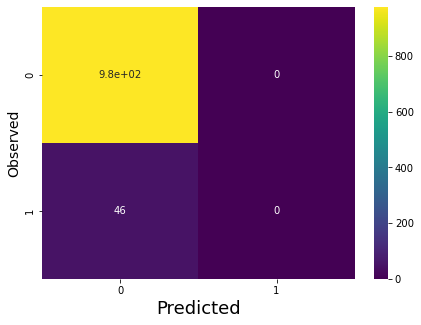

In [39]:
#Plotting the heat map
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap ="viridis")
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Observed', fontsize=14);

### By producing a classification report, it explains all evaluation metrics.


In [40]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       976
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



C:\Users\silvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\silvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\silvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plotting the accuracy score on Validation Data 

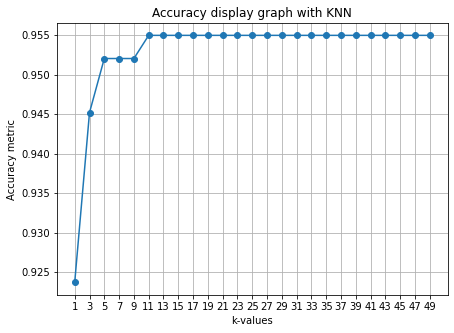

In [48]:
k_vals = []
accuracy_sc = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_sc.append(accuracy_score(y_test, y_pred))
    k_vals.append(k)


plt.figure(figsize = (7, 5))

plt.plot(k_values, accuracy_sc, marker = "o")
plt.title("Accuracy display graph with KNN")
plt.xlabel("k-values")
plt.ylabel("Accuracy metric")
plt.xticks(k_vals)
plt.grid();

### As observed , the accuracy has come out around 95% with the dataset we have. There are many other alternate models like Extreme Gradient Boost, 
### Support vector Machine, Random forest which can yield an accuracy of about same percent. But with the ease of use point, KNN is preferred over them.